# <font color = '#f364a2'> Информация о датасете

### Датасет содержит информацию о продажах в e-commerce

Email - *электронная почта покупателя* <br>
Adress - *адрес покупателя* <br>
Avatar - *аватарка покупателя* <br>
Avg. Session Length - *средняя длина сессии* <br>
Time on App - *время в приложении* <br>
Time on Website - *время на веб-сайте* <br>
Length of Membership - *срок членства* <br>
Yearly Amount Spent - *потраченная годовая сумма* <br>

###  Цель исследования - узнать зависимость между потраченной годовой суммой , средней длительностью сессии, длительностью сессии в приложении и на вебсайте и сроком членства.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy.stats
from scipy import stats
import statsmodels.api as sm
import missingno as msno

In [2]:
ecom = pd.read_csv('/Users/lisapletneva/Downloads/Ecommerce Customers.csv')
ecom.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

# <font color = '#f364a2'> Базовые преобразования датасета

### Для дальнейшей работы с датасетом нам не понадобятся некоторые колонки. Удалим их, а названия остальных для удобства приведем к одному виду

In [3]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
ecom = ecom.drop(['Email', 'Address', 'Avatar'], axis = 1)

In [5]:
ecom.columns = ['avg_session_length', 'time_on_app',
       'time_on_website', 'length_of_membership', 'yearly_amount_spent']
ecom.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

### Посмотрим типы данных колонок датафрейма

In [6]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_session_length    500 non-null    float64
 1   time_on_app           500 non-null    float64
 2   time_on_website       500 non-null    float64
 3   length_of_membership  500 non-null    float64
 4   yearly_amount_spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


 <font color = '#0158e3'> *Исходя из числа значений в строках, можем увидеть, что в колонках отсутствуют пропущенные значения. Убедимся в этом дополнительно, построив график.*

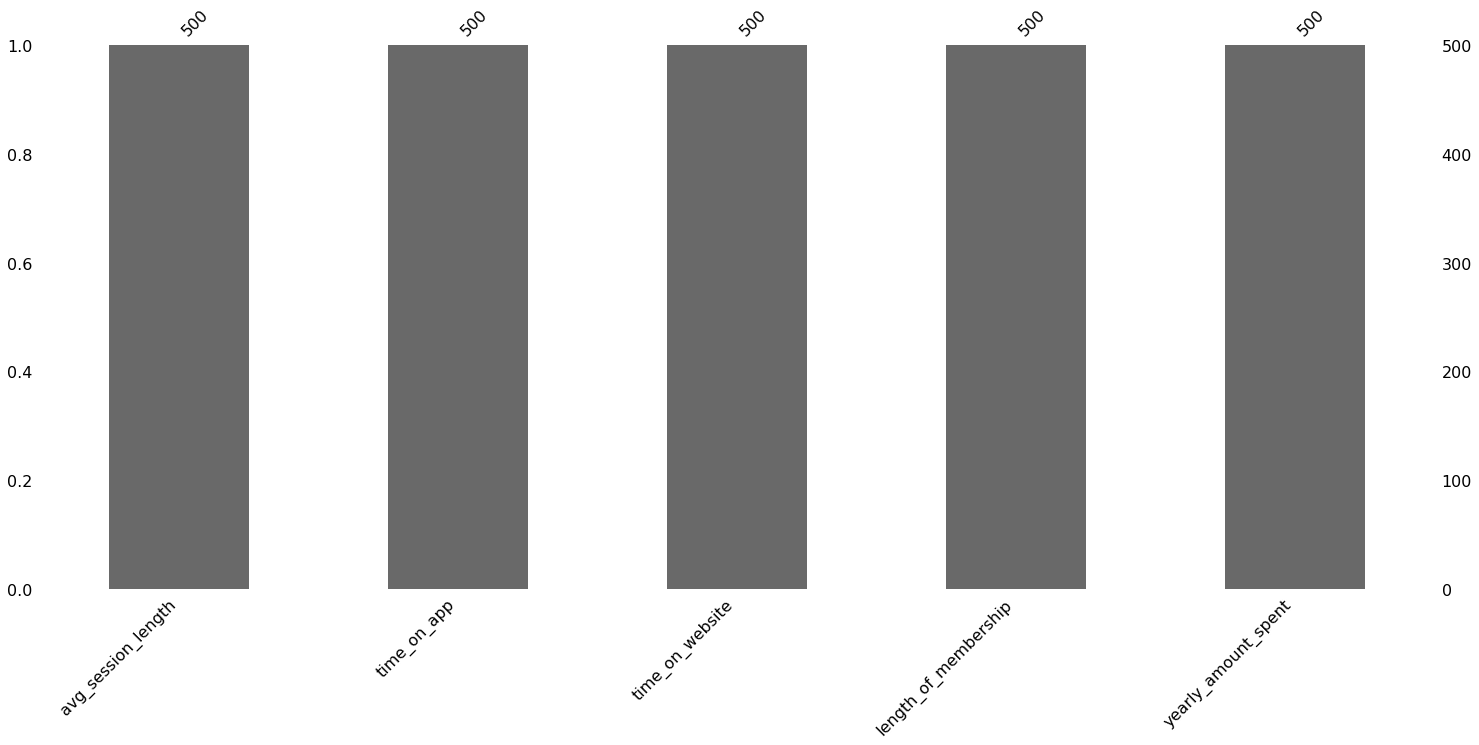

In [7]:
msno.bar(ecom)
plt.show()

# <font color = '#f364a2'> Базовый анализ датасета

### Посмотрим описательные статистики наши данных

In [8]:
ecom.describe()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       yearly_amount_spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462

 <font color = '#0158e3'> *В среднем клиенты взаимодействуют с компанией уже на протяжении 3,5 лет и тратят около 500 денежных единиц ежегодно. Их средняя длительность 1ой сессии - 33 минуты, время, проведенное в приложении, - 12 минут, и время на веб-сайте - 37 минут.*

### Для переменной "годовой расход" можем сделать несколько категорий

In [9]:
def get_spendings_cat(yearly_amount_spent):
    if yearly_amount_spent < 445:
        return 'Small spendings'
    elif yearly_amount_spent < 549:
        return 'Medium spendings'
    elif yearly_amount_spent < 600:
        return 'High spendings'
    elif yearly_amount_spent >= 600:
        return 'Extra-high spendings'
    else:
        return yearly_amount_spent

In [10]:
ecom['spendings_category'] = ecom['yearly_amount_spent'].apply(get_spendings_cat)
ecom.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent spendings_category  
0           587.951054     High spendings  
1           392.204933    Small spendings  
2           487.547505   Medium spendings  
3           581.852344     High spendings  
4           599.406092     High spendings

 <font color = '#0158e3'> *Перезапишем данные новой колонки в категориальные переменные*

In [11]:
ecom['spendings_category'] = pd.Categorical(ecom['spendings_category'])
ecom['spendings_category'].cat.categories

Index(['Extra-high spendings', 'High spendings', 'Medium spendings',
       'Small spendings'],
      dtype='object')

In [12]:
ecom['spendings_category'].value_counts()

Medium spendings        248
Small spendings         125
High spendings           85
Extra-high spendings     42
Name: spendings_category, dtype: int64

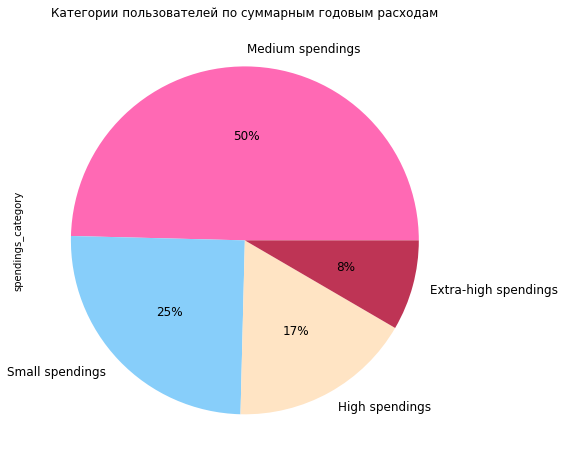

In [13]:
colors = ['#FF69B4', '#87CEFA', '#FFE4C4', '#BE3455']
ecom['spendings_category'].value_counts()\
.plot(kind = 'pie', colors = colors, title = 'Категории пользователей по суммарным годовым расходам',
      fontsize = 12, figsize = (8,8), autopct = '%.0f%%')
plt.show()

 <font color = '#0158e3'> *Категории получились не совсем одинаковые по размерам, однако как и должно быть категория "medium" преобладает.*

### Посмотрим чем характеризуется пользователь, потративший больше всего денег за год и меньше всего

In [14]:
ecom[ecom['yearly_amount_spent'] == ecom['yearly_amount_spent'].max()]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
65           34.374258    15.126994        37.157624              5.377594   

    yearly_amount_spent    spendings_category  
65           765.518462  Extra-high spendings

In [15]:
ecom[ecom['yearly_amount_spent'] == ecom['yearly_amount_spent'].min()]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
225           32.836941    10.256549        36.143908               0.78952   

     yearly_amount_spent spendings_category  
225           256.670582    Small spendings

 <font color = '#0158e3'> *Как мы видим, у обоих пользователей не большие различия в длительности сессии в срднем, в приложении и на компьютере. Наибольшие различия в длительности членства - у пользователя с максимальными тратами бОльший срок членства, в то время как пользователь с наименьшими тратами - новичок на сервисе.* <br>
    *Отсюда можем сделать предположение, что длительность членства оказывает наибольшее влияние среди всех переменных на годовые расходы пользователя.*

### Посмотрим чем характеризуется группа пользователей, потратившая больше всего денег за год и меньше всего

In [16]:
ecom[ecom['spendings_category'] == 'Extra-high spendings'].describe()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
count           42.000000    42.000000        42.000000             42.000000   
mean            33.559084    13.157357        36.978681              5.014156   
std              0.897138     0.818800         1.073899              0.740110   
min             31.945396    10.889828        33.913847              3.605934   
25%             32.942298    12.660598        36.353062              4.579245   
50%             33.540855    13.086115        37.149859              4.992874   
75%             34.326649    13.788756        37.776121              5.477975   
max             35.742670    15.126994        38.993322              6.922689   

       yearly_amount_spent  
count            42.000000  
mean            649.005530  
std              40.412892  
min             604.334840  
25%             616.708095  
50%             638.645094  
75%             665.545117  
max             765.518462

In [17]:
ecom[ecom['spendings_category'] == 'Small spendings'].describe()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
count          125.000000   125.000000       125.000000            125.000000   
mean            32.637310    11.427872        37.071095              2.512864   
std              0.968954     0.928884         0.980665              0.779690   
min             29.532429     8.508152        34.574028              0.269901   
25%             31.954904    10.942070        36.366843              2.083814   
50%             32.653181    11.448902        37.088847              2.602287   
75%             33.421212    11.918860        37.712509              3.072076   
max             34.606242    13.970181        39.294043              4.238296   

       yearly_amount_spent  
count           125.000000  
mean            399.729233  
std              42.132150  
min             256.670582  
25%             384.626572  
50%             409.094526  
75%             430.588883  
max             444.966552

 <font color = '#0158e3'> *Как мы видим, в случае групп пользователей наблюдается та же картина, что и при рассмотрении 1 пользователя с максимальными и минимальными тратами: наибольшая разница только в средних значениях переменной "длительность членства", остальные переменные не сильно отличаются.*

In [18]:
!pip install plotly==4.14.3 
import plotly.graph_objects as go
import plotly.express as px

In [19]:
fig = px.scatter(ecom, 
                 x='length_of_membership', y='yearly_amount_spent',  
                 title= 'Зависимость суммы годовых расходов от длительности членства')
fig.show()

 <font color = '#0158e3'> *Построенный график подтверждает, что есть линейная связь между длительностью членства и годовыми расходами. Подробнее на этом мы остановимся в разделе "Корреляция".*

# <font color = '#f364a2'> Z-оценка и поиск выбросов
   

### Рассчитаем Z-оценку для наших переменных

In [20]:
ecom['zscore_session_length'] = scipy.stats.zscore(ecom['avg_session_length'])
ecom['zscore_time_on_app'] = scipy.stats.zscore(ecom['time_on_app'])
ecom['zscore_time_on_website'] = scipy.stats.zscore(ecom['time_on_website'])
ecom['zscore_length_of_membership'] = scipy.stats.zscore(ecom['length_of_membership'])
ecom['zscore_spendings'] = scipy.stats.zscore(ecom['yearly_amount_spent'])
ecom.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent spendings_category  zscore_session_length  \
0           587.951054     High spendings               1.456351   
1           392.204933    Small spendings              -1.136502   
2           487.547505   Medium spendings              -0.052723   
3           581.852344     High spendings               1.263010   
4           599.406092     High spendings               0.279838   

   zscore_time_on_app  zscore_time_on_website  zscore_length_of_membership  \
0            0.607280                2.493589                     0.550107   
1           -0.949464                0.206556                    -0.870927   
2           -0.727139                0.049681                     0.572067   
3            1.676390               -0.335978                    -0.413996   
4            0.747770                0.471737                     0.914422   

   zscore_spendings  
0          1.118654  
1         -1.351783  
2         -0.148501  
3          1.041684  
4          1.263224

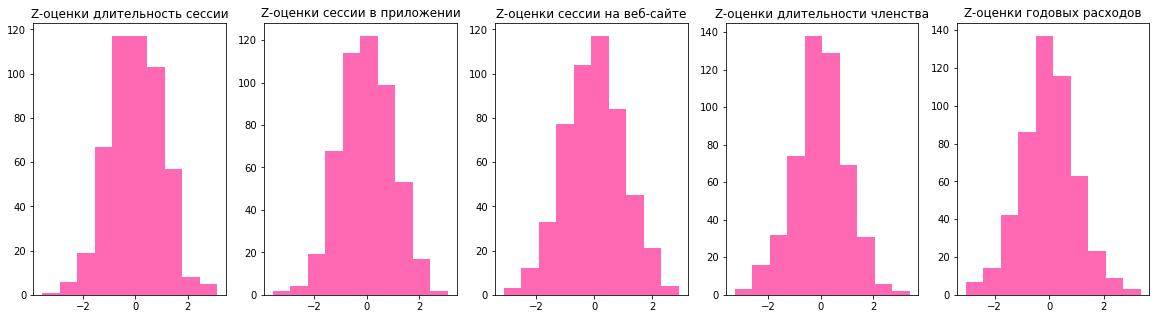

In [21]:
fig, ax = plt.subplots(1, 5, figsize=(20,5))

ax[0].hist(ecom['zscore_session_length'], color = '#FF69B4')
ax[0].set_title('Z-оценки длительность сессии')
ax[1].hist(ecom['zscore_time_on_app'], color = '#FF69B4')
ax[1].set_title('Z-оценки сессии в приложении')
ax[2].hist(ecom['zscore_time_on_website'], color = '#FF69B4')
ax[2].set_title('Z-оценки сессии на веб-сайте')
ax[3].hist(ecom['zscore_length_of_membership'], color = '#FF69B4')
ax[3].set_title('Z-оценки длительности членства')
ax[4].hist(ecom['zscore_spendings'], color = '#FF69B4')
ax[4].set_title('Z-оценки годовых расходов')

plt.show()

 <font color = '#0158e3'> *Как мы знаем, распределение Z-оценки сохраняет распределение оригинальных данных, поэтому мы можем говорить о том, что распределение наших оригинальных переменных близко к нормальному. 
    <br> Также с помощью этого метода посмотрим сколько строк данных у нас выходит за пределы -3 и 3 стандартных отклонений по переменной "годовые расходы":* 

In [22]:
ecom[(ecom['zscore_spendings'] < -3) | (ecom['zscore_spendings'] > 3)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
65            34.374258    15.126994        37.157624              5.377594   
157           34.603311    12.207298        33.913847              6.922689   
225           32.836941    10.256549        36.143908              0.789520   

     yearly_amount_spent    spendings_category  zscore_session_length  \
65            765.518462  Extra-high spendings               1.332296   
157           744.221867  Extra-high spendings               1.563296   
225           256.670582       Small spendings              -0.218091   

     zscore_time_on_app  zscore_time_on_website  zscore_length_of_membership  \
65             3.095491                0.096266                     1.847314   
157            0.155867               -3.117055                     3.395075   
225           -1.808197               -0.907932                    -2.748676   

     zscore_spendings  
65           3.359664  
157          3.090888  
225         -3.062310

 <font color = '#0158e3'> *Посмотрим выбросы также с помощью метода интерквартильного размаха для всех переменных нашего датасета. Колонки с Z-оценкой нам больше не понадобятся, поэтому удалим их.*

In [23]:
ecom = ecom.drop(['zscore_session_length', 'zscore_time_on_app', 'zscore_time_on_website', 'zscore_length_of_membership', 'zscore_spendings'], axis = 1)

### Поиск выбросов с помощью интерквартильного размаха

In [24]:
q1_1 = np.percentile(ecom['avg_session_length'], 25)
q3_1 = np.percentile(ecom['avg_session_length'], 75)
iqr_1 = q3_1 - q1_1
iqr_lower_level_1 = q1_1 - 1.5 * iqr_1
iqr_upper_level_1 = q3_1 + 1.5 * iqr_1
ecom[(ecom['avg_session_length'] > iqr_upper_level_1) | (ecom['avg_session_length'] < iqr_lower_level_1)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
12            29.532429    10.961298        37.420216              4.046423   
154           36.139662    12.050267        36.959643              3.864861   
390           35.860237    11.730661        36.882149              3.416210   

     yearly_amount_spent spendings_category  
12            408.640351    Small spendings  
154           595.803819     High spendings  
390           546.556667   Medium spendings

In [25]:
q1_2 = np.percentile(ecom['time_on_app'], 25)
q3_2 = np.percentile(ecom['time_on_app'], 75)
iqr_2 = q3_2 - q1_2
iqr_lower_level_2 = q1_2 - 1.5 * iqr_2
iqr_upper_level_2 = q3_2 + 1.5 * iqr_2
ecom[(ecom['time_on_app'] > iqr_upper_level_2) | (ecom['time_on_app'] < iqr_lower_level_2)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
65            34.374258    15.126994        37.157624              5.377594   
309           34.102279     8.508152        35.462400              1.838211   
362           33.981006     9.316289        36.914952              2.868428   
442           34.083663     8.668350        35.906756              2.252446   

     yearly_amount_spent    spendings_category  
65            765.518462  Extra-high spendings  
309           302.189548       Small spendings  
362           384.326057       Small spendings  
442           308.527747       Small spendings

In [26]:
q1_3 = np.percentile(ecom['time_on_website'], 25)
q3_3 = np.percentile(ecom['time_on_website'], 75)
iqr_3 = q3_3 - q1_3
iqr_lower_level_3 = q1_3 - 1.5 * iqr_3
iqr_upper_level_3 = q3_3 + 1.5 * iqr_3
ecom[(ecom['time_on_website'] > iqr_upper_level_3) | (ecom['time_on_website'] < iqr_lower_level_3)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
69            32.179100    11.187539        40.005182              3.552650   
157           34.603311    12.207298        33.913847              6.922689   

     yearly_amount_spent    spendings_category  
69            451.575685      Medium spendings  
157           744.221867  Extra-high spendings

In [27]:
q1_4 = np.percentile(ecom['length_of_membership'], 25)
q3_4 = np.percentile(ecom['length_of_membership'], 75)
iqr_4 = q3_4 - q1_4
iqr_lower_level_4 = q1_4 - 1.5 * iqr_4
iqr_upper_level_4 = q3_4 + 1.5 * iqr_4
ecom[(ecom['length_of_membership'] > iqr_upper_level_4) | (ecom['length_of_membership'] < iqr_lower_level_4)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
50            33.256335    13.858062        37.780265              5.976768   
151           32.887105    12.387184        37.431159              6.401229   
153           31.945396    12.965761        36.966389              6.076654   
157           34.603311    12.207298        33.913847              6.922689   
161           33.503705    12.399436        35.012806              0.968622   
173           32.529769    11.747732        36.939882              0.801516   
225           32.836941    10.256549        36.143908              0.789520   
303           30.816201    11.851399        36.925043              1.084585   
379           33.971722    12.284467        38.295725              1.130477   
396           35.742670    10.889828        35.565436              6.115199   
434           33.666616    10.985764        36.352503              0.936498   
447           32.904854    12.556108        37.805509              0.269901   

     yearly_amount_spent    spendings_category  
50            725.584814  Extra-high spendings  
151           684.163431  Extra-high spendings  
153           657.019924  Extra-high spendings  
157           744.221867  Extra-high spendings  
161           357.591439       Small spendings  
173           298.762008       Small spendings  
225           256.670582       Small spendings  
303           266.086341       Small spendings  
379           385.095007       Small spendings  
396           669.987141  Extra-high spendings  
434           304.135592       Small spendings  
447           314.438518       Small spendings

In [28]:
q1_5 = np.percentile(ecom['yearly_amount_spent'], 25)
q3_5 = np.percentile(ecom['yearly_amount_spent'], 75)
iqr_5 = q3_5 - q1_5
iqr_lower_level_5 = q1_5 - 1.5 * iqr_5
iqr_upper_level_5 = q3_5 + 1.5 * iqr_5
ecom[(ecom['yearly_amount_spent'] > iqr_upper_level_5) | (ecom['yearly_amount_spent'] < iqr_lower_level_5)]

avg_session_length  time_on_app  time_on_website  length_of_membership  \
50            33.256335    13.858062        37.780265              5.976768   
65            34.374258    15.126994        37.157624              5.377594   
157           34.603311    12.207298        33.913847              6.922689   
205           34.967610    13.919494        37.952013              5.066697   
225           32.836941    10.256549        36.143908              0.789520   
299           30.492537    11.562936        35.976565              1.481617   
303           30.816201    11.851399        36.925043              1.084585   
368           34.385820    12.729720        36.232110              5.705941   
415           31.517122    10.745189        38.791235              1.428824   

     yearly_amount_spent    spendings_category  
50            725.584814  Extra-high spendings  
65            765.518462  Extra-high spendings  
157           744.221867  Extra-high spendings  
205           712.396327  Extra-high spendings  
225           256.670582       Small spendings  
299           282.471246       Small spendings  
303           266.086341       Small spendings  
368           708.935185  Extra-high spendings  
415           275.918421       Small spendings

 <font color = '#0158e3'> *Для переменной "годовые расходы" мы также раннее искали выбросы с помощью метода 3 сигм и с его помощью у нас было обнаружено всего 3 выброса.*

 <font color = '#0158e3'> *Также мы могли бы посмотреть выбросы с помощью ящика с усами, например для пременной "проведенное время на веб-сайте":*

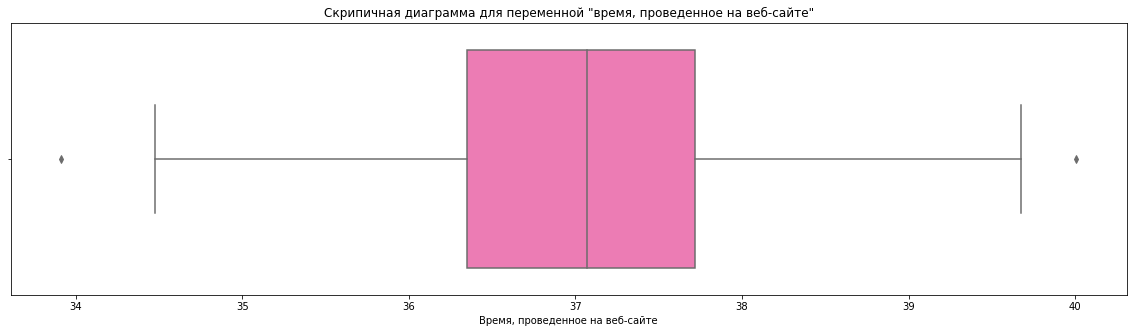

In [29]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20,5))
sns.boxplot(x = 'time_on_website', data = ecom, color = '#FF69B4')
plt.xlabel('Время, проведенное на веб-сайте')
plt.title('Скрипичная диаграмма для переменной "время, проведенное на веб-сайте"')
plt.show()

 <font color = '#0158e3'> *Посмотрим также для остальных переменных ящики с усами:*

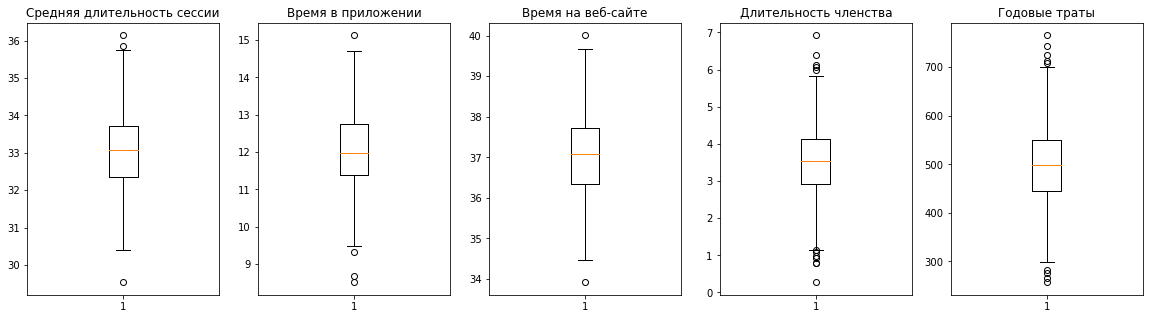

In [30]:
fig, ax = plt.subplots(1, 5, figsize=(20,5))

ax[0].boxplot(ecom['avg_session_length'])
ax[0].set_title('Средняя длительность сессии')
ax[1].boxplot(ecom['time_on_app'])
ax[1].set_title('Время в приложении')
ax[2].boxplot(ecom['time_on_website'])
ax[2].set_title('Время на веб-сайте')
ax[3].boxplot(ecom['length_of_membership'])
ax[3].set_title('Длительность членства')
ax[4].boxplot(ecom['yearly_amount_spent'])
ax[4].set_title('Годовые траты')

plt.show()

 <font color = '#0158e3'> *В наших данных выбросов достаточно мало, более того, они не сильно выходят за границы допустимых значений и не являются ошибкой ввода данных. Поэтому мы принимаем решение оставить данные с выбросами, так как это не повлияет на результаты анализа.*

# <font color = '#f364a2'> Распределение данных

### Мы уже убедились в нормальности распределения данных через Z-оценку, но рассмотрим дополнительно графики распределения переменных

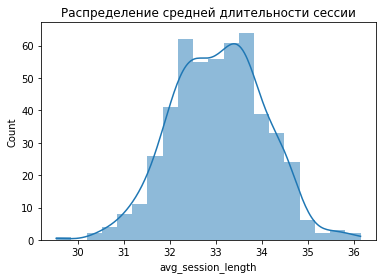

In [31]:
sns.histplot(ecom['avg_session_length'], kde = True, linewidth = 0)
plt.title('Распределение средней длительности сессии')
plt.show()

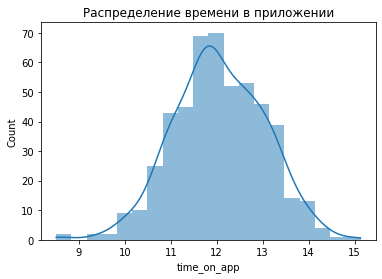

In [32]:
sns.histplot(ecom['time_on_app'], kde = True, linewidth = 0)
plt.title('Распределение времени в приложении')
plt.show()

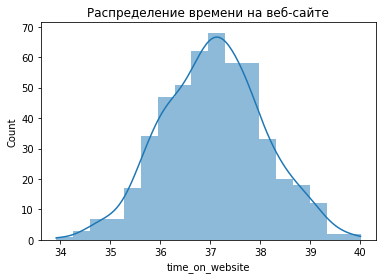

In [33]:
sns.histplot(ecom['time_on_website'], kde = True, linewidth = 0)
plt.title('Распределение времени на веб-сайте')
plt.show()

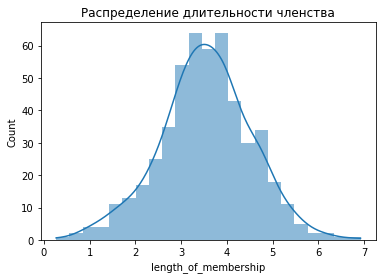

In [34]:
sns.histplot(ecom['length_of_membership'], kde = True, linewidth = 0)
plt.title('Распределение длительности членства')
plt.show()

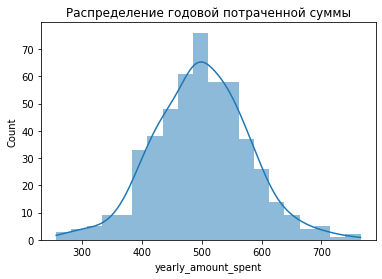

In [35]:
sns.histplot(ecom['yearly_amount_spent'], kde = True, linewidth = 0)
plt.title('Распределение годовой потраченной суммы')
plt.show()

 <font color = '#0158e3'> *Распределение наших переменных выглядит близко к нормальному, аналогично распределению Z-оценок, поэтому нет необходимости в нормализации данных путем логарифмирования, извлечения корня и т.д.*

# <font color = '#f364a2'> Корреляция

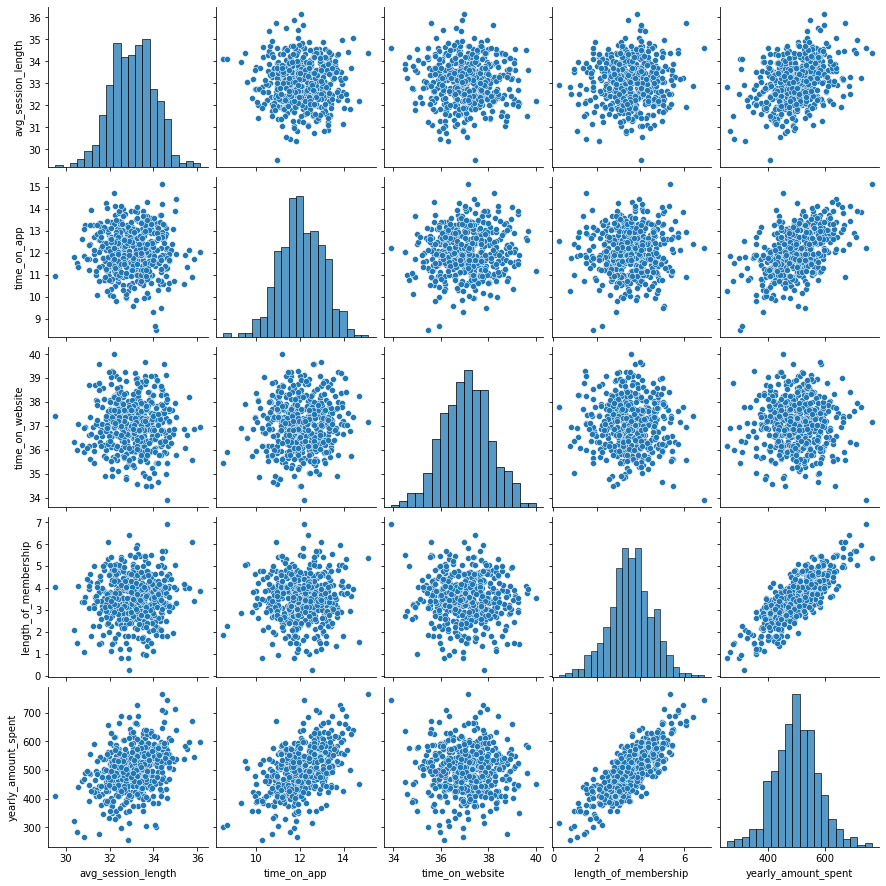

In [36]:
sns.pairplot(ecom)
plt.show()

In [37]:
ecom.corr()

avg_session_length  time_on_app  time_on_website  \
avg_session_length              1.000000    -0.027826        -0.034987   
time_on_app                    -0.027826     1.000000         0.082388   
time_on_website                -0.034987     0.082388         1.000000   
length_of_membership            0.060247     0.029143        -0.047582   
yearly_amount_spent             0.355088     0.499328        -0.002641   

                      length_of_membership  yearly_amount_spent  
avg_session_length                0.060247             0.355088  
time_on_app                       0.029143             0.499328  
time_on_website                  -0.047582            -0.002641  
length_of_membership              1.000000             0.809084  
yearly_amount_spent               0.809084             1.000000

In [38]:
ecom.corr()['yearly_amount_spent'].apply(np.abs).sort_values()

time_on_website         0.002641
avg_session_length      0.355088
time_on_app             0.499328
length_of_membership    0.809084
yearly_amount_spent     1.000000
Name: yearly_amount_spent, dtype: float64

 <font color = '#0158e3'> *Для большей наглядности построим тепловую корреляционную матрицу*

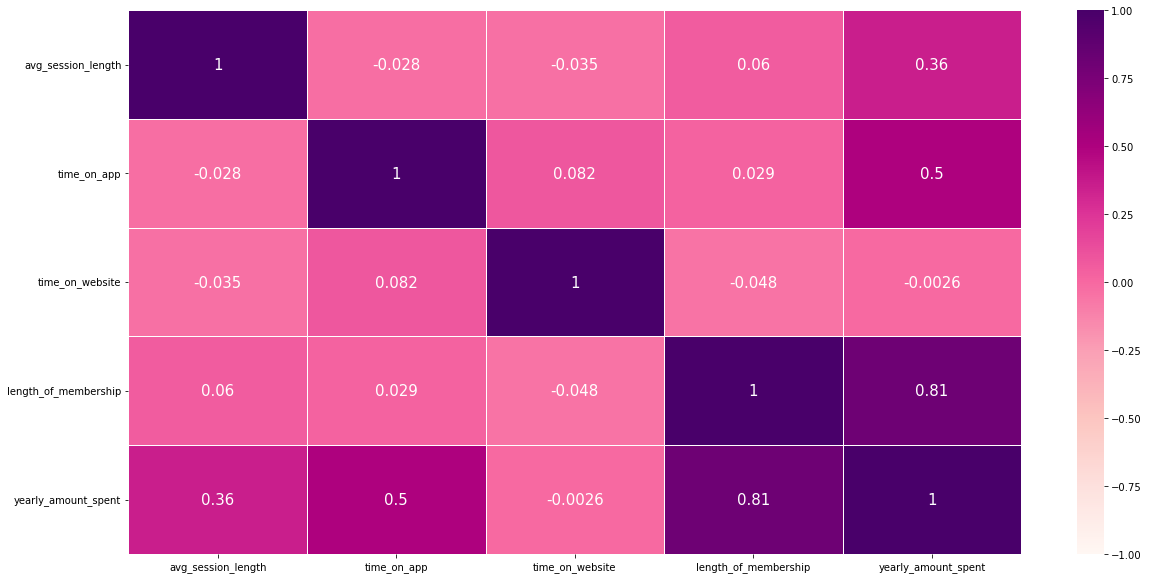

In [39]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(ecom.corr(), annot = True, cmap='RdPu', linecolor = 'white',  
            linewidth = 0.5, annot_kws = {'size' : 15}, vmax = 1, vmin = -1)
plt.show()

 <font color = '#0158e3'> *Как мы видим, мультиколлинеарность между нашими независимыми переменными отсутствует. Что касается связи между зависимой переменной - годовые расходы и остальными независимыми переменными, то: 
        <br> - наибольшая положительная корреляция с переменной "длительность членства" - 0.81; 
        <br> - средняя положительная корреляцция с переменной "время, проведенное в приложении" - 0.5; 
        <br> - слабая положительная связь с "среднем временем сессии" - 0.36; 
        <br> - очень слабая отрицательная корреляция с переменной "время, проведенное на веб-сайте" -  -0.0026.*

### Построим диаграммы рассеяния по переменным, которые наиболее коррелируются с годовыми расходами: длительность членства и время, проведенное в приложении.

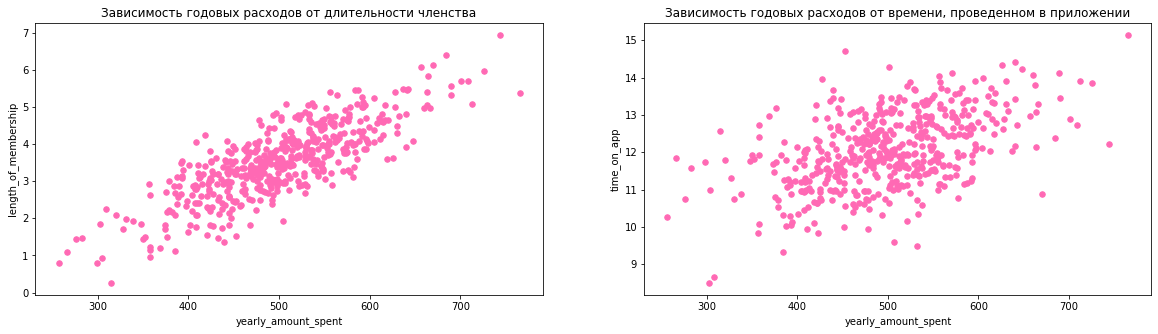

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ecom.plot('yearly_amount_spent','length_of_membership', kind = 'scatter', figsize = (20,5), s = 30,
                    color = '#FF69B4', title = 'Зависимость годовых расходов от длительности членства', ax=ax[0])
ecom.plot('yearly_amount_spent','time_on_app', kind = 'scatter', figsize = (20,5), s = 30,
                    color = '#FF69B4', title = 'Зависимость годовых расходов от времени, проведенном в приложении', ax=ax[1])
plt.show()

 <font color = '#0158e3'> *Исходя из построенных диаграмм рассеяния понятно, что между переменными есть положительная линейная зависимость и она сильнее у пары длительность членства + годовые расходы, чем у время в приложении + годовые расходы.*

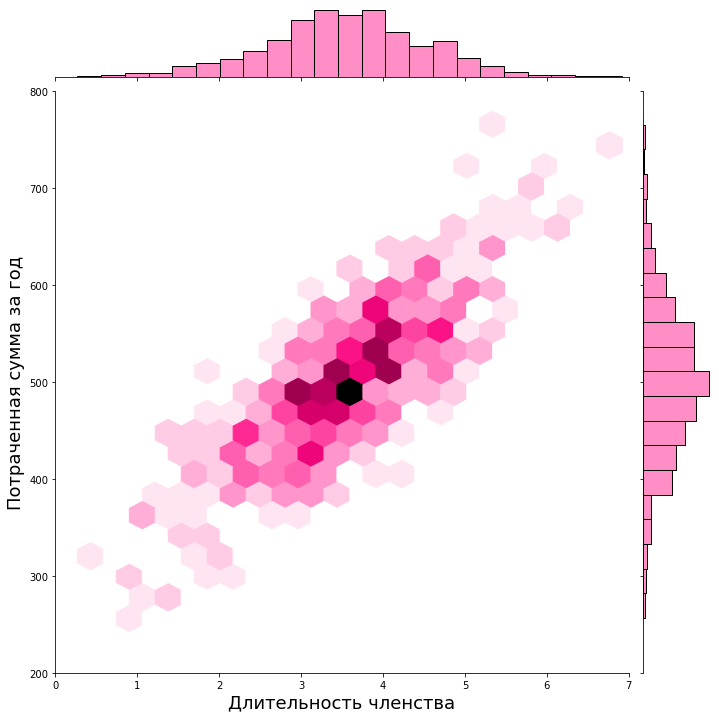

In [41]:
p = sns.jointplot(x = 'length_of_membership', y = 'yearly_amount_spent',\
                  data = ecom,\
                  kind = 'hex', height=10, ratio=7, color ='#FF69B4',\
                  xlim=[0,7] , ylim=[200, 800])\
.set_axis_labels('Длительность членства', 'Потраченная сумма за год', size=18)


plt.show()

 <font color = '#0158e3'> *Еще один график наглядно демонстрирующий сильную корреляционную связь.*

# <font color = '#f364a2'> Тестирование гипотез - критерий хи-квадрат

### H0: Не существует зависимости между временем, проведенным в приложении и годовой потраченной суммой <br> H1: Существует статистически значимая связь между временем, проведенном в приложении сервиса и годовой потраченной суммой клиентом

<font color = '#0158e3'> *Для начала нам нужно создать дополнительную колонку с категориями по длительности сессии в приложении.*

In [42]:
def get_time_app_cat(time_on_app):
    if time_on_app < 12:     #12 - среднее значение нашей переменной "время в приложении"
        return 'less than average'
    elif time_on_app >= 12:
        return 'more than average'
    else:
        return time_on_app 

In [43]:
ecom['time_app_category'] = ecom['time_on_app'].apply(get_time_app_cat)

In [44]:
ecom['time_app_category'] = pd.Categorical(ecom['time_app_category'])
ecom['time_app_category'].cat.categories

Index(['less than average', 'more than average'], dtype='object')

 <font color = '#0158e3'> *Посмотрим какой у нас получился итоговый датафрейм для проверки гипотезы*

In [45]:
app_spends_o = ecom.groupby('time_app_category')['spendings_category'].value_counts().unstack()
app_spends_o

Extra-high spendings  High spendings  Medium spendings  \
time_app_category                                                           
less than average                     1              31               122   
more than average                    41              54               126   

                   Small spendings  
time_app_category                   
less than average               97  
more than average               28

 <font color = '#0158e3'> *Для начала рассчитаем критерий хи-квадрат вручную*

In [46]:
alpha = 0.05     #уровень значимости
dof_1 = (2-1)*(4-1)    #2 - ряда и 4 - колонки
print(dof_1)

3


In [47]:
critical_value_xi_1 = scipy.stats.chi2.ppf(0.95,3) #рассчитываем критическое значение хи-квадрат
critical_value_xi_1

7.814727903251179

In [48]:
n_total = app_spends_o.sum().sum()   #смотрим суммарное количество наблюдений
n_total

500

In [49]:
n_target_0 = app_spends_o['Extra-high spendings'].sum()     #суммируем значения колонок
n_target_1 = app_spends_o['High spendings'].sum()
n_target_2 = app_spends_o['Medium spendings'].sum()
n_target_3 = app_spends_o['Small spendings'].sum()
print(n_target_0, n_target_1, n_target_2, n_target_3)

42 85 248 125


In [50]:
p_target_0 = n_target_0 / n_total     #смотрим пропорции для каждой категории расходов
p_target_1 = n_target_1 / n_total
p_target_2 = n_target_2 / n_total
p_target_3 = n_target_3 / n_total
print(p_target_0, p_target_1, p_target_2, p_target_3)

0.084 0.17 0.496 0.25


In [51]:
n_less = app_spends_o.iloc[0].sum()     #считаем общее число пользователей, которые проводят мало времени в приложении
n_more = app_spends_o.iloc[1].sum()     #считаем общее число пользователей, которые проводят много времени в приложении
print(n_less, n_more)

251 249


In [52]:
f_e_target_0_less = n_less * p_target_0     #рассчитываем теоретические частоты для тех, кто проводит мало времени в приложении
f_e_target_1_less = n_less * p_target_1
f_e_target_2_less = n_less * p_target_2
f_e_target_3_less = n_less * p_target_3
print(f_e_target_0_less, f_e_target_1_less, f_e_target_2_less, f_e_target_3_less)

21.084 42.67 124.496 62.75


In [53]:
f_e_target_0_more = n_more * p_target_0    #рассчитываем теоретические частоты для тех, кто проводит много времени в приложении
f_e_target_1_more = n_more * p_target_1
f_e_target_2_more = n_more * p_target_2
f_e_target_3_more = n_more * p_target_3
print(f_e_target_0_more, f_e_target_1_more, f_e_target_2_more, f_e_target_3_more)

20.916 42.330000000000005 123.504 62.25


In [54]:
app_spends_e = np.array([[f_e_target_0_less, f_e_target_1_less, f_e_target_2_less, f_e_target_3_less],
                [f_e_target_0_more, f_e_target_1_more, f_e_target_2_more, f_e_target_3_more]])   #собираем матрицу частот
app_spends_e

array([[ 21.084,  42.67 , 124.496,  62.75 ],
       [ 20.916,  42.33 , 123.504,  62.25 ]])

In [55]:
chi_2_1 = ((app_spends_o  - app_spends_e)**2 / app_spends_e).sum().sum()
print(chi_2_1)

82.46460306968416


In [56]:
print(chi_2_1, critical_value_xi_1)
print(chi_2_1 > critical_value_xi_1)

82.46460306968416 7.814727903251179
True


 <font color = '#0158e3'> *Расчитаем также критерий хи-квадрат с помощью функций из библиотеки scipy*

In [57]:
chi_2_2, p_val, df, expected = scipy.stats.chi2_contingency(app_spends_o, correction = False)
print(chi_2_2, p_val, df, expected)

82.46460306968417 9.084199002136562e-18 3 [[ 21.084  42.67  124.496  62.75 ]
 [ 20.916  42.33  123.504  62.25 ]]


In [58]:
critical_value_xi_2 = scipy.stats.chi2.ppf(0.95, 3)
critical_value_xi_2

7.814727903251179

In [59]:
print(chi_2_2, critical_value_xi_2)
print(chi_2_2 > critical_value_xi_2)

82.46460306968417 7.814727903251179
True


### Вывод: значение хи-квадрат больше критического значения (и при расчете вручную, и с помощью функции), значит мы опровергаем гипотезу H0 и  принимаем гипотезу H1: <br> Существует статистически значимая связь между временем, проведенном в приложении сервиса и годовой потраченной суммой клиентом

# <font color = '#f364a2'> Тестирование гипотез - критерий Стьюдента

 <font color = '#0158e3'> *Проверим аналогичные гипотезы с помощью параметрического критерия - критерия Стьюдента*

### H0: Не существует зависимости между временем, проведенным в приложении и годовой потраченной суммой <br> H1: Существует статистически значимая связь между временем, проведенном в приложении сервиса и годовой потраченной суммой клиентом

 <font color = '#0158e3'> *Двусторонний тест
    <br> alpha = 0.05*

 <font color = '#0158e3'> *Для начала нам нужно разбить наш датасет на части для дальнейшего использования в тестировании гипотезы.
    <br> Так как у нас уже были созданы категории по годовым тратам, но там их 4, создадим новую колонку с 2 категориями по уровню расходов.*

In [60]:
def get_spendings_cat_2(yearly_amount_spent):
    if yearly_amount_spent < 500:     # 500 - медиана
        return 'Small'
    elif yearly_amount_spent >= 500:
        return 'High'
    else:
        return yearly_amount_spent

In [61]:
ecom['spendings_category_2'] = ecom['yearly_amount_spent'].apply(get_spendings_cat_2)

In [62]:
ecom['spendings_category_2'] = pd.Categorical(ecom['spendings_category_2'])
ecom['spendings_category_2'].cat.categories

Index(['High', 'Small'], dtype='object')

In [63]:
small = ecom[ecom['spendings_category_2'] == 'Small']['time_on_app']
high = ecom[ecom['spendings_category_2'] == 'High']['time_on_app']

 <font color = '#0158e3'> *Нам необходимо соблюдение 2 условий:
       <br> - распределение переменных нормальное
       <br> - дисперсии переменных равны*

### Проверим нормальность распределения

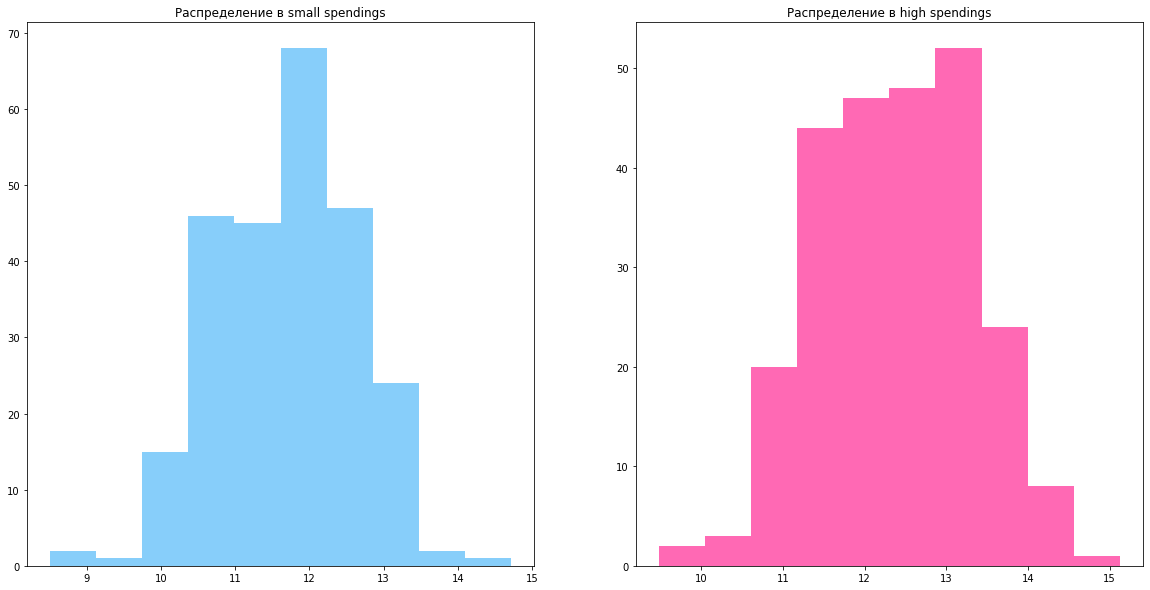

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].hist(small, color = '#87CEFA')
ax[0].set_title('Распределение в small spendings')
ax[1].hist(high, color = '#FF69B4')
ax[1].set_title('Распределение в high spendings')


plt.show()

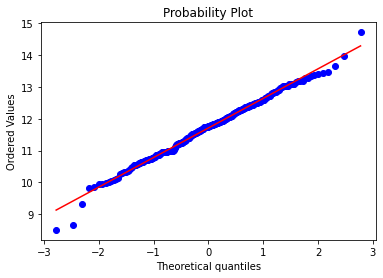

<Figure size 432x288 with 0 Axes>

In [65]:
stats.probplot(small, plot = plt)
plt.figure()
plt.show()

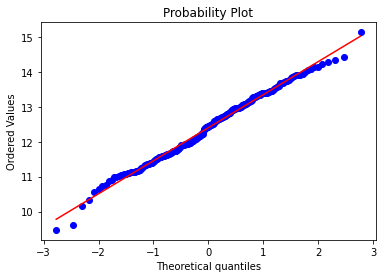

<Figure size 432x288 with 0 Axes>

In [66]:
stats.probplot(high, plot = plt)
plt.figure()
plt.show()

 <font color = '#0158e3'> *В целом мы можем говорить о том, что распределения наших переменных стремятся к нормальному. Теперь проверим второе условие - равенство дисперсий.*

### Проверка равенства дисперсий

In [67]:
print(small.var(), high.var())

0.8577040072063945 0.8845358352364218


 <font color = '#0158e3'> *Как мы видим рассчитанные значения дисперсий близки друг к другу,  поэтому нет необходимости в использовании  поправки Уэлча-Саттертуэйта для вычисления количества степеней свободы.*

### Проверка гипотезы

 <font color = '#0158e3'> *Для начала рассчитаем вручную значение t-статистики*

In [68]:
n_1 = len(small)     #смотрим количество наблюдений в выборках
n_2 = len(high)
dof_2 = n_1 + n_2 - 2     #рассчитываем степени свободы
var_1 = small.var()    #дисперсия для 1 выборки
var_2 = high.var()     #дисперсия для 2 выборки
print(n_1, n_2, dof_2, var_1, var_2)

251 249 498 0.8577040072063945 0.8845358352364218


In [69]:
v_1 = var_1/n_1      #дисперсия/количество наблюдений
v_2 = var_2/n_2
s_m1_m2 = np.sqrt(v_1 + v_2)    #считаем стандартную ошибку
print(s_m1_m2)

0.08348353245414812


In [70]:
mean_1 = small.mean()    #считаем средние выборок
mean_2 = high.mean()
print(mean_1, mean_2)

11.709037051334978 12.398697464650542


In [71]:
t = (mean_1 - mean_2)/ s_m1_m2
print(t)

-8.261035356815416


In [72]:
t_critical = scipy.stats.t.ppf(0.95,498)
t_critical

1.6479191388549999

In [73]:
def hypothesis_check(p_value, t_critical):
    if abs(t) > t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')


In [74]:
hypothesis_check(t, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


 <font color = '#0158e3'> *Расчет t-статистики с помощью функций из библиотеки scipy*

In [75]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
                                 mean_2, np.sqrt(var_2), n_2,
                                 equal_var = True)

Ttest_indResult(statistic=-8.261545299603217, pvalue=1.3088562210433427e-15)

In [76]:
scipy.stats.ttest_ind(small, high, equal_var = True)

Ttest_indResult(statistic=-8.261545299603108, pvalue=1.3088562210443815e-15)

<font color = '#0158e3'> *Как видим, мы получили то же значение t-статистики, как и когда рассчитывали вручную. А значение p-value очень маленькое, что говорит о низкой вероятности ошибки первого рода (когда мы можем отвергнуть верную нулевую гипотезу).*

In [77]:
CI_bottom = (mean_1 - mean_2) - t_critical * s_m1_m2
CI_top = (mean_1 - mean_2) + t_critical * s_m1_m2
print(CI_bottom, CI_top)

-0.827234524225978 -0.5520863024051517


<font color = '#0158e3'> *С 95% вероятностью мы можем утверждать, что разница между средними наших выборок лежит в диапазоне от - 0.827 до -0.552 (значения получились отрицательными, так как среднее 1ой выборки - Small у нас меньше среднего 2ой выборки - High.*)

### Вывод: Мы опровергли гипотезу H0 и поэтому принимаем гипотезу H1: <br> Существует статистически значимая связь между временем, проведенном в приложении сервиса и годовой потраченной суммой клиентом

# <font color = '#f364a2'> Линейная регрессия

### В результате проведенного анализа, мы выяснили, что у нас соблюдаются условия для линейной регрессии:
1) Отсутствуют пропуски в данных
<br> 2) Значения количественные
<br> 3) Нет мультиколлинеарности между независимыми переменными
<br> 4) Z-оценка распределена нормально у всех переменных

<font color = '#0158e3'> *Удалим лишние колонки с категориями, которые нам были нужны для проверки гипотез*

In [78]:
ecom.columns

Index(['avg_session_length', 'time_on_app', 'time_on_website',
       'length_of_membership', 'yearly_amount_spent', 'spendings_category',
       'time_app_category', 'spendings_category_2'],
      dtype='object')

In [79]:
ecom = ecom.drop(['spendings_category','time_app_category', 'spendings_category_2'], axis = 1)
ecom.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

<font color = '#0158e3'> *Эту таблицу и будем использовать для построения уравнения линейной регрессии. <br> Независимые переменные - длительность сессии, время в приложении, время на веб-сайте, длительность членства. <br> Зависимая переменная - годовая сумма расходов.*

### Линейная регрессия с одним предиктором

<font color = '#0158e3'> *Исходя из нашего прошлого анализа, мы видели, что наибольшая положительная линейная связь между нашей независимой переменной "длительность членства" и нашей зависимой переменной - годовая сумма расходов. <br> Для начала можем построить модель с одним предиктором.*

In [80]:
X = ecom['length_of_membership']
y = ecom['yearly_amount_spent']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=64.2186843155843, intercept=272.3997860580282, rvalue=0.809083568247581, pvalue=4.806615782585021e-117, stderr=2.090279301330526, intercept_stderr=7.675028829464639)


<font color = '#0158e3'> *Интерпретация: <br> slope -  наш уровень наклона, значение коэффициента перед предиктором "длительность членства". Означает, что при увеличении срока членства на 1 единицу, годовые расходы увеличиваются на 64.2 единицы. <br> intercept - место, где линия пересекает ось y. <br> p-value очень маленький, что говорит о значимой связи между переменными.*

In [81]:
r_sq = res.rvalue ** 2
print(r_sq)

0.6546162204082381


<font color = '#0158e3'> *Мы получили хорошее значение для коэффициентся детерминации - 0.66. Наша модель на 66% объясняет дисперсию в целевой переменной.* 

<font color = '#0158e3'> *Теперь построим график, чтобы посмотреть как проходить линия регрессии через наши оригинальные данные.*

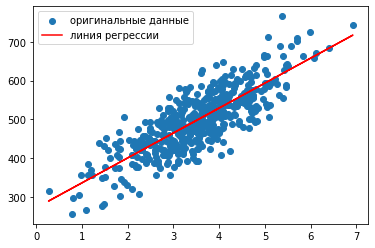

In [82]:
plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()

<font color = '#0158e3'> *Проверим наши расчеты еще с помощью библиотеки statsmodels.api.*

In [83]:
X_simple = ecom['length_of_membership']
y = ecom['yearly_amount_spent']
X_simple_constant = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                             OLS Regression Results                            
Dep. Variable:     yearly_amount_spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 14 Dec 2022   Prob (F-statistic):          4.81e-117
Time:                         10:26:16   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

<font color = '#0158e3'> *Как видим, полученные данные совпадают: коэффициент детерминации и коэффициенты наклона и пересечения с осью y.*

### Линейная регрессия с несколькими предикторами

<font color = '#0158e3'> *Так как у нас 4 независимых переменных, не будем производить громоздкие расчеты вручную, а сразу обратимся к библиотеке statsmodels.api.*

In [84]:
X_mult = sm.add_constant(ecom[['avg_session_length', 'time_on_app', 'time_on_website', 'length_of_membership']])
y = ecom['yearly_amount_spent']

model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                             OLS Regression Results                            
Dep. Variable:     yearly_amount_spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                         10:26:16   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

<font color = '#0158e3'> *Множественная модель линейной регрессии показывает существенно лучшие результаты - коэффициент детерминации вырос до 0,98, что является почти идеалом.<br> Все переменные идут с положительными коэффициентами и все они стат.значимы (если брать уровень значимости на уровне 0.05), за исключением переменной "время, проведенное на веб-сайте".*

##### Таким образом уравнение множественной линейной регрессии выглядит следующим образом:
Годовые расходы = -1051.59 + 25.73 * длина сессии + 38.71 * время в приложении + 61.58 * длительность членства

# <font color = '#f364a2'> Логистическая регрессия

### Логистическая регрессия - частный случай линейной регрессии, но вместо количественной зависимой переменной, зависимая переменная может принимать 2 значения - то есть является бинарной.
Таким образом нам необходимо снова создать 2 категории на основе нашей зависимой переменной - сумма годовых расходов. Так как мы это уже проделывали раннее, просто возьмем уже написанную нами функцию, однако заменим в ней small на 0, а high на 1, и создадим новый столбик.

In [85]:
def get_spendings_cat_3(yearly_amount_spent):
    if yearly_amount_spent < 500:     # 500 - медиана
        return '0'
    elif yearly_amount_spent >= 500:
        return '1'
    else:
        return yearly_amount_spent

In [86]:
ecom['spendings_category_3'] = ecom['yearly_amount_spent'].apply(get_spendings_cat_3)
ecom.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent spendings_category_3  
0           587.951054                    1  
1           392.204933                    0  
2           487.547505                    0  
3           581.852344                    1  
4           599.406092                    1

In [87]:
ecom['spendings_category_3'] = ecom['spendings_category_3'].astype(int)

### Логистическая регрессия с одним предиктором
Как и в случае с линейной регрессией, для начала построим логистическую регрессию с одним предиктором - длительность членства.

In [88]:
X = sm.add_constant(ecom['length_of_membership'])
y = ecom['spendings_category_3']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.416052
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     spendings_category_3   No. Observations:                  500
Model:                            Logit   Df Residuals:                      498
Method:                             MLE   Df Model:                            1
Date:                  Wed, 14 Dec 2022   Pseudo R-squ.:                  0.3998
Time:                          10:26:16   Log-Likelihood:                -208.03
converged:                         True   LL-Null:                       -346.57
Covariance Type:              nonrobust   LLR p-value:                 3.239e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -9.0323      0.834    -10.824      0.000     -10

In [89]:
np.exp(-9.0323) 

0.00011948735596679469

<font color = '#0158e3'> *Если предиктор равен 0 (то есть длительность членства = 0), то шансы того, что пользователь потратит большую годовую сумму на сервисе 0.00012 к 1, то есть очень низкие.*

In [90]:
np.exp(2.5432)

12.720310907159261

<font color = '#0158e3'> *Если длительность членства увеличивается на 1 единицу, то шансы того, что пользователь потратит большую годовую сумму на сервисе в 12 раз выше.*

### Логистическая регрессия с несколькими предикторами

In [91]:
cols_num = ['avg_session_length', 'time_on_app', 'time_on_website', 'length_of_membership']

In [92]:
X = sm.add_constant(ecom[cols_num])
y = ecom['spendings_category_3']
         
logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.090373
         Iterations 12
                            Logit Regression Results                            
Dep. Variable:     spendings_category_3   No. Observations:                  500
Model:                            Logit   Df Residuals:                      495
Method:                             MLE   Df Model:                            4
Date:                  Wed, 14 Dec 2022   Pseudo R-squ.:                  0.8696
Time:                          10:26:16   Log-Likelihood:                -45.186
converged:                         True   LL-Null:                       -346.57
Covariance Type:              nonrobust   LLR p-value:                3.904e-129
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -325.0529     50.680     -6.414      0.000    -42

<font color = '#0158e3'> *Видим, что данная модель с несколькими предикторами лучше объясняет взаимосвязь между переменными, так как псевдо R-квадрат здесь выше - 0,87 vs 0,40 (в предыдущей модели). Однако, все равно линейная регрессия лучше объясняет взаимосвязь, так как R-квадрат равен 0,98.*
    <br> *Как и в случае с линейной регрессией, один коэффициент у нас не стат. значим - время, проведенное на веб-сайте.*

In [93]:
np.exp(5.6606) 

287.3209834386824

<font color = '#0158e3'> *При увеличении длительности сессии на 1 единицу - шанс, что пользователь потратит больше денег на сервисе за год растет в 287 раз.*

In [94]:
np.exp(7.0969) 

1208.2157940504846

<font color = '#0158e3'> *При увеличении длительности сессии в приложении на 1 единицу - шанс, что пользователь потратит больше денег на сервисе за год растет в 1208 раз.*

In [95]:
np.exp(12.4612) 

258125.19547879876

<font color = '#0158e3'> *При увеличении длительности членства на 1 единицу - шанс, что пользователь потратит больше денег на сервисе за год растет в 258125 раз.*

### Таким образом, мы доказали, что есть взаимосвязь между независимыми переменными нашего датасета:
### - средней длительностью сессии
### - временем, проведенным в приложении
### - временем, проведенным на веб-сайте
### - длительностью членства
### И зависимой переменной - годовая сумма расходов.
### Лучше всего связь описывается уравнением множественной линейной регрессии: 
### <font color = '#0158e3'> Годовые расходы = -1051.59 + 25.73 * длина сессии + 38.71 * время в приложении + 61.58 * длительность членства